In [ ]:
import torch
from models.pose_hrnet import get_pose_net
from config import cfg, update_config

# Load configuration
cfg.defrost()
cfg.merge_from_file('experiments/coco/hrnet/w32_256x192_adam_lr1e-3.yaml')
cfg.freeze()

# Load model
model = get_pose_net(cfg, is_train=False)
model.load_state_dict(torch.load('models/pytorch/pose_coco/pose_hrnet_w32_256x192.pth'))
model.eval()


c:\Users\Nagham\MambaPython\envs\TechnionAiProg\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Nagham\MambaPython\envs\TechnionAiProg\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


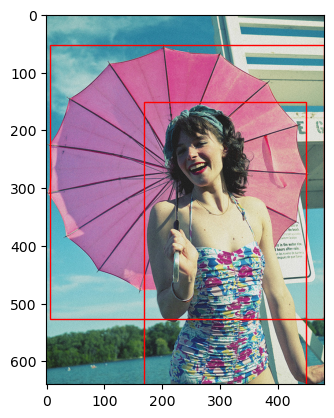

In [2]:
import torch
import torchvision
from PIL import Image
from torchvision import transforms

# Load a pre-trained Faster R-CNN model
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()  # Set the model to evaluation mode

# Define a transformation to convert the image to a tensor
transform = transforms.Compose([
    transforms.ToTensor()
])

# Load an image
image_path = r"C:\Users\Nagham\HRNet-Human-Pose-Estimation\data\coco\train2017\000000000036.jpg"
image = Image.open(image_path)
image_tensor = transform(image)

# Add a batch dimension (as the model expects a batch of images)
image_tensor = image_tensor.unsqueeze(0)

# Perform inference
with torch.no_grad():
    predictions = model(image_tensor)


import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Get the predicted bounding boxes, labels, and scores
boxes = predictions[0]['boxes']
labels = predictions[0]['labels']
scores = predictions[0]['scores']

# Set a threshold to filter weak predictions
score_threshold = 0.8
filtered_boxes = boxes[scores > score_threshold]
filtered_scores = scores[scores > score_threshold]
filtered_labels = labels[scores > score_threshold]

# Plot the image and draw the bounding boxes
fig, ax = plt.subplots(1)
ax.imshow(image)

# Loop over the bounding boxes
for box in filtered_boxes:
    xmin, ymin, xmax, ymax = box
    width = xmax - xmin
    height = ymax - ymin
    # Create a rectangle patch
    rect = patches.Rectangle((xmin, ymin), width, height, linewidth=1, edgecolor='r', facecolor='none')
    # Add the patch to the Axes
    ax.add_patch(rect)

plt.show()


In [14]:
import torch
import torchvision
from PIL import Image
import matplotlib.pyplot as plt

# Load pre-trained Faster R-CNN model
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

# Define image transformations
transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor()])


In [15]:
# Load the image
image_path = r"C:\Users\Nagham\HRNet-Human-Pose-Estimation\data\coco\train2017\000000000036.jpg"
image = Image.open(image_path).convert("RGB")
image_tensor = transform(image).unsqueeze(0)  # Add batch dimension


In [16]:
# Perform inference
with torch.no_grad():
    predictions = model(image_tensor)

# Extract relevant information from predictions
boxes = predictions[0]['boxes'].cpu().numpy()
labels = predictions[0]['labels'].cpu().numpy()
scores = predictions[0]['scores'].cpu().numpy()

In [17]:
# COCO dataset class ID for "person" is 1
PERSON_CLASS_ID = 1


In [18]:
# Set a confidence threshold
confidence_threshold = 0.5

# Filter boxes for humans with scores above the threshold
human_boxes = [box for box, label, score in zip(boxes, labels, scores) if label == PERSON_CLASS_ID and score > confidence_threshold]


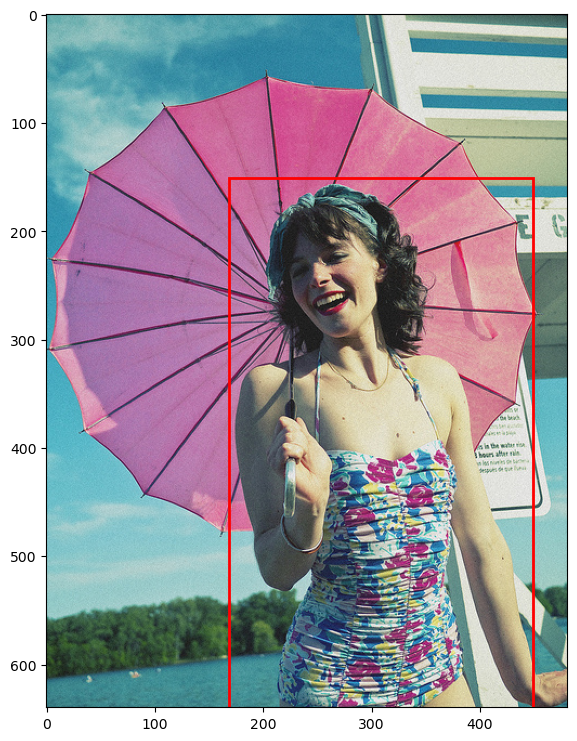

In [19]:
# Plot the image and draw the bounding boxes
fig, ax = plt.subplots(1, figsize=(12, 9))
ax.imshow(image)

# Draw bounding boxes
for box in human_boxes:
    xmin, ymin, xmax, ymax = box
    width, height = xmax - xmin, ymax - ymin
    rect = plt.Rectangle((xmin, ymin), width, height, fill=False, color='red', linewidth=2)
    ax.add_patch(rect)

plt.show()
